# Ejercicio 4.4

**Problema 1:** Análisis de sentimientos de tweets. Vamos a crear un máquina que pueda decirnos qué tan positivo, neutral o negativo son una serie de respuestas de twitter.
Las respuestas son:

> Gran mexicano y excelente en su área, su muerte es una enorme perdida y debería ser luto nacional!!!

> Vaya señora que bueno que se asesora por alguien inteligente no por el ignorante del Gatt.

> Se me ocurre y sin ver todos los videos de Plazti que me informéis por dónde empiezo. Entiendo que os tendría que decir quién soy y que quiero, vamos conocerme para asesorarme bien.

> Soy docente universitario, estoy intentando preparar mis clases en modo platzi bien didáctico, (le llamo modo noticiero), descargue una plataforma gratuita de grabación y transmisión de vídeo, se llama Obs estudio!bueno la sigo remando con sus funciones pero sé que saldrá algo!

## Primero vamos a crear listas con los tweets a analizar

In [19]:
a = 'Gran mexicano y excelente en su área, su muerte es una enorme perdida y debería ser luto nacional!!!'
a = a.replace("!","").replace(",","").lower().split(" ")

In [22]:
b = 'Vaya señora que bueno que se asesora por alguien inteligente no por el ignorante del Gatt.'
c = 'Se me ocurre y sin ver todos los videos de Plazti que me informéis por dónde empiezo. Entiendo que os tendría que decir quién soy y que quiero, vamos conocerme para asesorarme bien.'
d = 'Soy docente universitario, estoy intentando preparar mis clases en modo platzi bien didáctico, (le llamo modo noticiero), descargue una plataforma gratuita de grabación y transmisión de vídeo, se llama Obs estudio!bueno la sigo remando con sus funciones pero sé que saldrá algo!'

In [23]:
b = b.replace("!","").replace(",","").lower().split(" ")
c = c.replace("!","").replace(",","").lower().split(" ")
d = d.replace("!","").replace(",","").lower().split(" ")

## Contamos las palabras, positivas, neutras y negativas

In [49]:
import numpy as np

In [64]:
def contador(x: list):
    palabras_positivas = ["gran", "excelente", "bueno", "inteligente","bien", "platzi", "gratuita"]
    palabra_neutras = ["enorme", "perdida", "video", "entiendo", "docente", "sé", "funciones"]
    palabras_negativas = ["muerte", "enorme", "luto","ignorante"]

    contador_postivas, contador_neutras, contador_negativas = 0, 0, 0
    
    for palabra in palabras_positivas:
        contador_postivas = contador_postivas + x.count(palabra)
    for palabra in palabra_neutras:
        contador_neutras = contador_neutras + x.count(palabra)
    for palabra in palabras_negativas:
        contador_negativas = contador_negativas + x.count(palabra)
    resultado = [contador_postivas, contador_neutras, contador_negativas]
    
    return resultado
    
def promedio(x: list):
    suma = 0
    for dato in x:
        suma = suma + dato
    promedio = suma/len(x)
    return promedio

def score(x: list):
    valor = np.array([1,0,-1])
    dato = np.array(x)
    return np.dot(valor,dato)

def contador_final(x:list):
    a = contador(x)
    b = promedio(a)
    c = score(a)
    return a,b,c

In [67]:
print(contador_final(a))
print(contador_final(b))
print(contador_final(c))
print(contador_final(d))

([2, 2, 3], 2.3333333333333335, -1)
([2, 0, 1], 1.0, 1)
([0, 1, 0], 0.3333333333333333, 0)
([3, 3, 0], 2.0, 3)


In [61]:
datos = contador(b)
print(datos)

prom = promedio(datos)
print(prom)

sc = score(datos)
print(sc)

[2, 0, 1]
1.0
1


In [62]:
datos = contador(c)
print(datos)

prom = promedio(datos)
print(prom)

sc = score(datos)
print(sc)

[0, 1, 0]
0.3333333333333333
0


In [63]:
datos = contador(d)
print(datos)

prom = promedio(datos)
print(prom)

sc = score(datos)
print(sc)

[3, 3, 0]
2.0
3


# Problema 5.2

**Problema: Potencia en un clúster de procesadores y temperatura.** La temperatura $T$ de un cluster de tres procesadores es una función afín de la potencia de los procesadores $P^T = [P_{0},  P_{1}, P_{2}]$. Cuando los tres procesadores están en reposo tenemos que $P^T = [10 , 10, 10]$ lo cual nos da una temperatura de $T=35$. Cuando el primer procesador opera a potencia absoluta tenemos que $P^T = [100,  10, 10]$ y la temperatura se eleva a $T=60$. Cuando el segundo procesador opera a su máxima capacidad tenemos $P^T = [10, 100, 10]$ y la temperatura se eleva a $T=75$. Cuando el tercer procesador opera a máxima potencia mientras que los otros dos están en reposo tenemos que $P^T = [10, 10, 100]$ y la temperatura se elevea a $T=65$. Supongamos que los tres procesadores operan a máxima potencia ¿Qué temperatura se alcanza? La temperatura de fusión de los procesadores (a la que los procesadores se derriten) es cerca de $150$ ¿Cuál es la potencia máxima que pueden alcanzar los procesadores para que $T  \le 150$?,

*Hint:* $T(P) = a^T P + b$


In [79]:
def Temperatura(x: np.array):
 a =np.array([0.27777778,0.44444444,0.33333333])
 b = 24.444444
 return np.dot(x,a)+b

In [83]:
Temperatura(np.array([100,100,100]))

129.99999899999997

In [74]:
a = np.array([[10, 10, 10, 1],[100, 10, 10, 1],[10,100,10,1],[10,10,100,1]])
b = np.array([35,60,75,65])
x=np.linalg.solve(a,b)
print(x)



[ 0.27777778  0.44444444  0.33333333 24.44444444]


# 9.1 Un ejemplo en el uso de desviación estándar

Retorno promedio y riesgo de inversión. Supongamos que un vector representa una serie de tiempo del retorno de una inversión, expresado como un porcentaje, en períodos de tiempo. El promedio de los valor de la serie de tiempo nos darán el valor esperado de procentaje de retorno de inversión mientras que la desviación será una medida de riesgo para nuestra inversión.

In [84]:
import matplotlib.pyplot as plt
import numpy as np

In [85]:
a = np.array([0.1]*50)
b = np.sin(np.linspace(0,4,50)) + np.random.uniform(-0.1,0.1,50)
c = np.cos(np.linspace(2,6,50)) + np.random.uniform(-0.1,0.1,50)
d = [i - np.random.uniform(0,0.8) for i in np.linspace(0,1,50)]

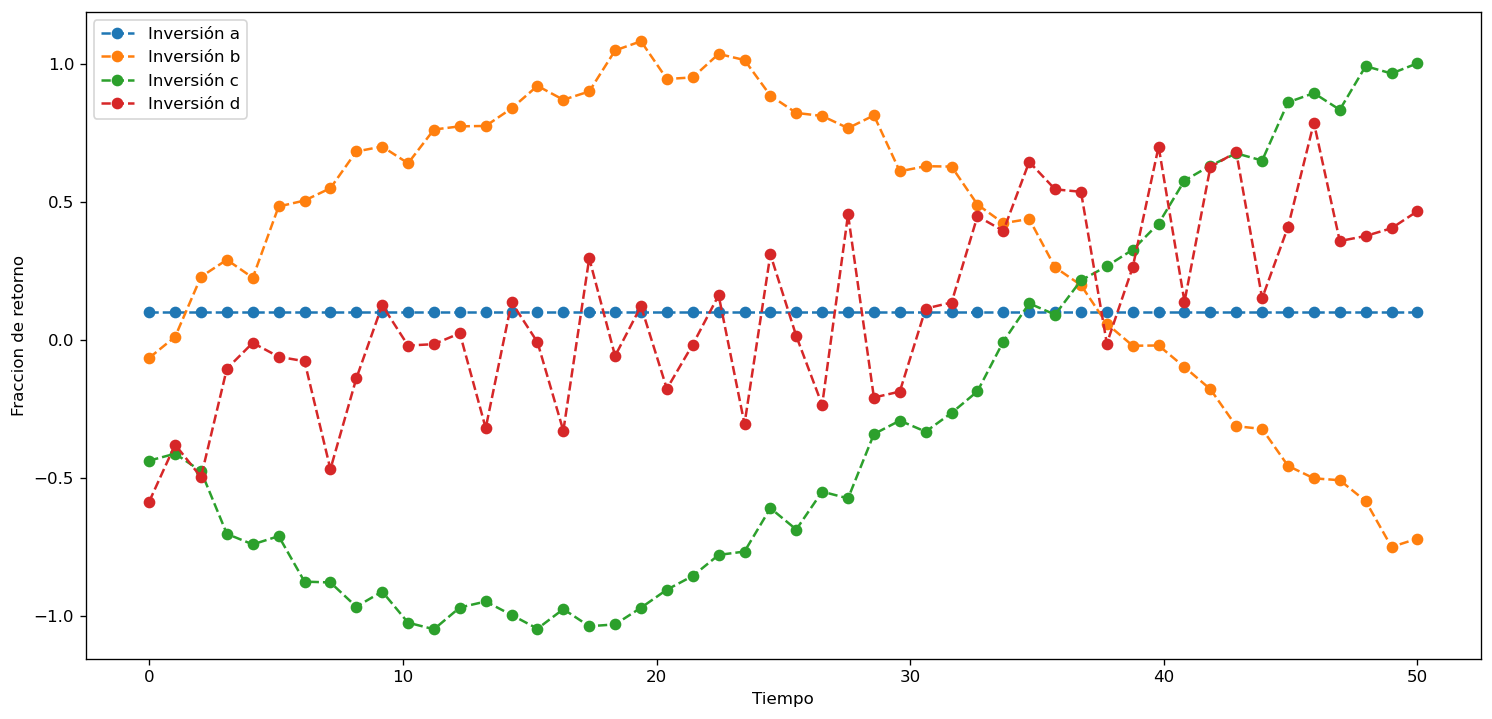

In [86]:
fig,ax  = plt.subplots(1,1,figsize=(15,7),dpi=120)
ax.plot(np.linspace(0,50,50),a, marker='o', linestyle='dashed',label='Inversión a')
ax.plot(np.linspace(0,50,50),b, marker='o', linestyle='dashed',label='Inversión b')
ax.plot(np.linspace(0,50,50),c, marker='o', linestyle='dashed',label='Inversión c')
ax.plot(np.linspace(0,50,50),d, marker='o', linestyle='dashed',label='Inversión d')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Fraccion de retorno')
ax.legend()
plt.show()

In [87]:
I = np.array([a,b,c,d])

In [88]:
M = np.array([np.mean(x) for x in I])
S = np.array([np.std(x) for x in I])

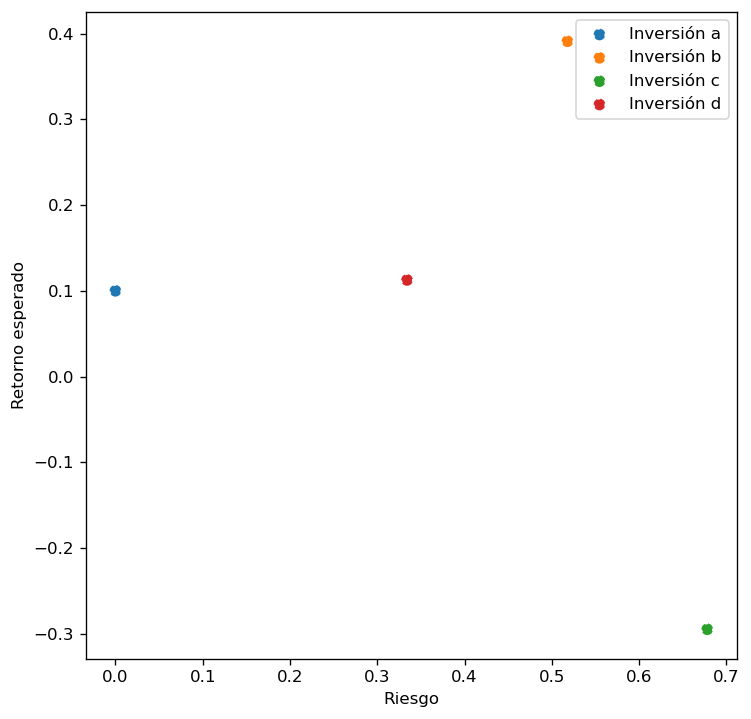

In [92]:
fig,ax  = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter(S[0],M[0], linestyle='dashed',label='Inversión a')
ax.scatter(S[1],M[1], linestyle='dashed',label='Inversión b')
ax.scatter(S[2],M[2], linestyle='dashed',label='Inversión c')
ax.scatter(S[3],M[3], linestyle='dashed',label='Inversión d')
ax.set_xlabel('Riesgo')
ax.set_ylabel('Retorno esperado')
ax.legend()
plt.show()

In [1]:
from sklearn.datasets import fetch_openml
import random

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

/home/dionicio/anaconda3/envs/platzi/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KeyboardInterrupt: 